# Iterative phase estimation

The quantum phase estimation (QPE) algorithm is one of the most important and famous quantum algorithms. It is a key subroutine of Shor's factoring algorithm, as well as algorithms for quantum simulation. The textbook version of the algorithm uses a number of auxiliary qubits which scales with the desired precision, leading to circuits that are challenging to execute on today's noisy devices with limited qubit number and connectivity.

Iterative phase estimation (IPE) is a variant of QPE which requires only one auxiliary qubit. In IPE, the auxiliary qubit is repeatedly measured, with the measurement results used to guide future quantum operations. Such classical feed-forward was previously impossible to execute on IBM's quantum processors, but with the recently introduced dynamic circuits capabilities, it is now possible.

**Problem statement:** Given a unitary matrix $U$ and an eigenstate $|\Psi\rangle$ of $U$ with an unknown eigenvalue $e^{i 2\pi \varphi}$, estimate the value of $\varphi$.

### The algorithm

Let's first assume for simplicity that $\varphi$ can have an exact binary expansion, that is, it can be written as
$$
\varphi = \varphi_1/2 + \varphi_2/4 + \cdots + \varphi_m/2^m = 0.\varphi_1 \varphi_2 \cdots \varphi_m
$$

The $k$-th step of the IPE, getting $\varphi_{m-k+1}$, consists of the register initialization ($q_0$ in $|+\rangle$, $q_1$ in $|\Psi\rangle$), the application of a *controlled*-$U^{2^{m-k}}$, a rotation around $Z$ of angle $\omega_k = -2 \pi 0.0\varphi_{m-k+2} ... \varphi_m$, and a measurement of $q_0$ in the Pauli $X$ basis: a Hadamard transform to $q_0$, and a measurement of $q_0$ in the computational basis. Note that $q_1$ remains in the state $|\Psi\rangle$ throughout the algorithm.

<span style="color:red">*Note: rotation operations are comutative. In this example, we first apply phse correction, then the U-gate.*<span>

### Step 1

In the first step of the algorithm, we measure the least significant bit of $\varphi$.

The operation will be:
$$ S =
\begin{pmatrix}
1 & 0\\
0 & e^{i\pi / 2}
\end{pmatrix}$$

In [2]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np


def step_1_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    qc = QuantumCircuit(qr, cr)
    qc.h(0)
    qc.x(1)
    theta = np.pi 
    qc.cp(theta, 0, 1)
    qc.h(0)
    qc.measure(0, 0)

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
qc = step_1_circuit(qr, cr)
#qc.draw("mpl")

### Step 2

In the first step, we measured the least significant bit $\varphi_2$. In the second step, we extract the next bit $\varphi_1$, which will involve applying a phase correction to cancel out the phase contribution from $\varphi_2$. Therefore, we obtain th efull bit string for our angle.

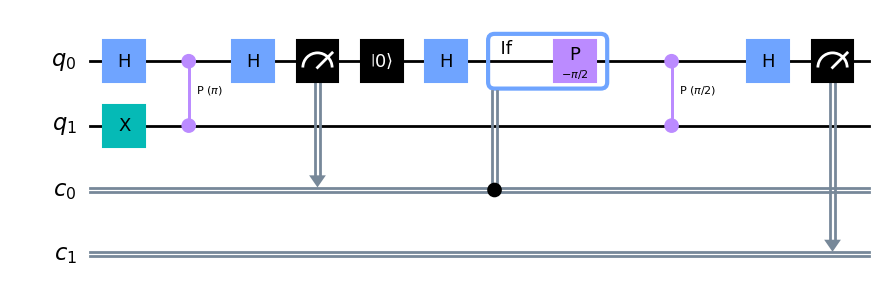

In [3]:
def step_2_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr is a quantum register with 2 qubits
    # cr is a classical register with 2 bits

    # begin with the circuit from Step 1
    qc = step_1_circuit(qr, cr)
    qc.reset(0)
    qc.h(0)
    
    theta = - np.pi / 2
    theta1 = np.pi / 2
    
    condition = cr[0] == 1
    with qc.if_test((condition, True)):
        qc.p(theta, qr[0]) 
    qc.cp(theta1, 0, 1) 
    qc.h(0)
    qc.measure(0,1)
    ####### your code goes here #######

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
qc = step_2_circuit(qr, cr)
qc.draw("mpl")